In [2]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series

In [3]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')


**Loading Dataset**

In [4]:
training = pd.read_csv("training_set.csv")
testing = pd.read_csv("testing_set.csv")

In [5]:
training.head(20)



,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
5,5,25-08-2012 05:00,2
6,6,25-08-2012 06:00,2
7,7,25-08-2012 07:00,2
8,8,25-08-2012 08:00,6
9,9,25-08-2012 09:00,2


In [6]:
testing.head(20)

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00
5,18293,26-09-2014 05:00
6,18294,26-09-2014 06:00
7,18295,26-09-2014 07:00
8,18296,26-09-2014 08:00
9,18297,26-09-2014 09:00


In [7]:
training_org = training.copy()
testing_org = testing.copy()

In [8]:
training.dtypes,testing.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [9]:
training.shape, testing.shape

((18288, 3), (5112, 2))

**Feature Extraction**

In [10]:
training['Datetime'] = pd.to_datetime(training.Datetime, format = '%d-%m-%Y %H:%M')
testing['Datetime'] = pd.to_datetime(testing.Datetime, format = '%d-%m-%Y %H:%M')


In [11]:
training_org['Datetime'] = pd.to_datetime(training_org.Datetime, format = '%d-%m-%Y %H:%M')
testing_org['Datetime'] = pd.to_datetime(testing_org.Datetime, format = '%d-%m-%Y %H:%M')

In [12]:
for i in (training, testing, training_org, testing_org):   
    i['month'] = i.Datetime.dt.month
    i['year'] = i.Datetime.dt.year
    i['Hour']=i.Datetime.dt.hour
    i['day']= i.Datetime.dt.day
    

In [13]:
training['Day of week'] = training['Datetime'].dt.dayofweek
temporary = training['Datetime']


In [14]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0
    
temporary2 = training['Datetime'].apply(applyer)
training['weekend'] = temporary2

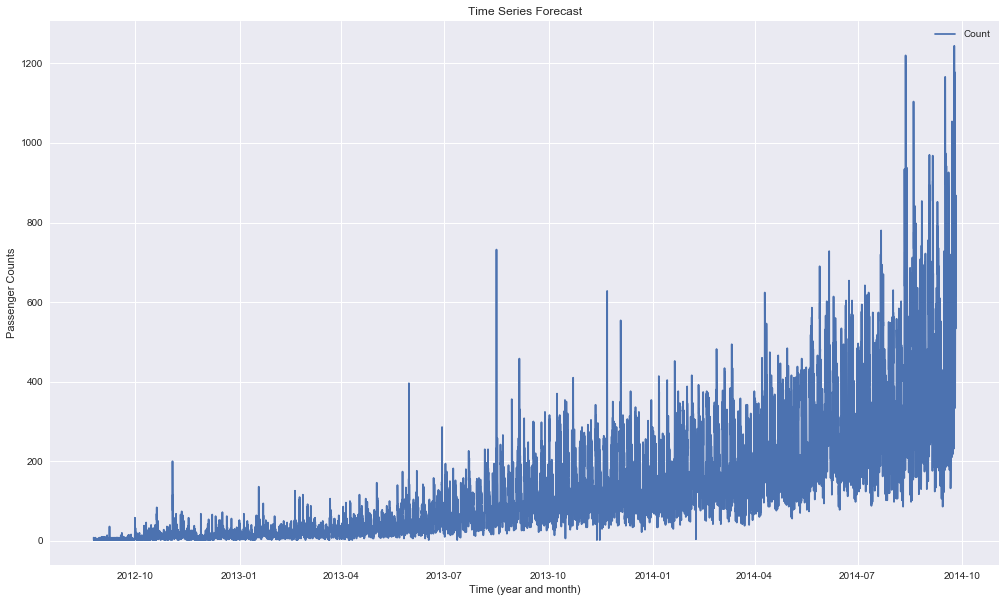

In [15]:
training.index = training['Datetime']
df = training.drop('ID',1)
tss = df['Count']
plt.figure(figsize = (17,10))
plt.plot(tss)
plt.title("Time Series Forecast")
plt.xlabel("Time (year and month)")
plt.ylabel("Passenger Counts")
plt.legend(loc = 'best')

**Performing Exploratoy data analysis on data**

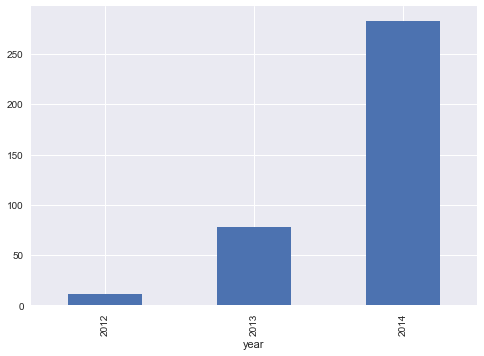

In [16]:
training.groupby('year')['Count'].mean().plot.bar()

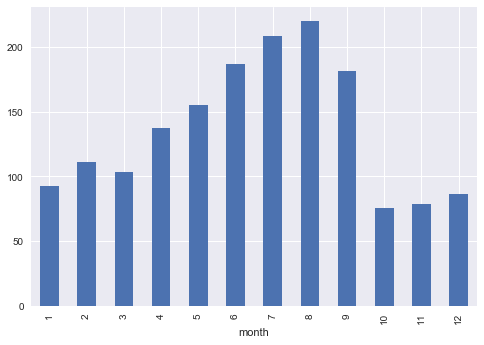

In [17]:
training.groupby('month')['Count'].mean().plot.bar()

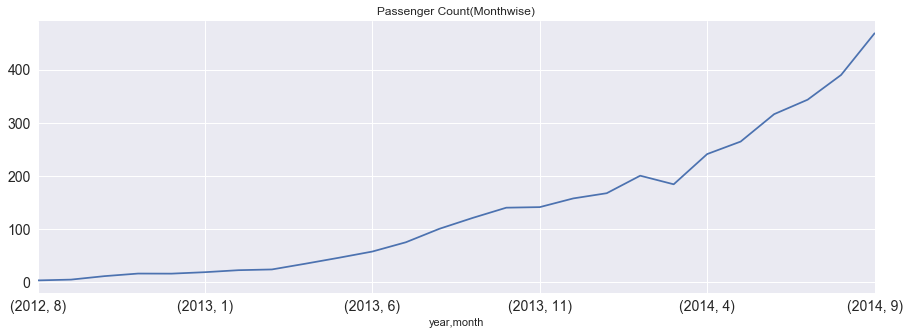

In [18]:
temporary = training.groupby(['year', 'month'])['Count'].mean()
temporary.plot(figsize =(15,5), title = "Passenger Count(Monthwise)", fontsize = 14)

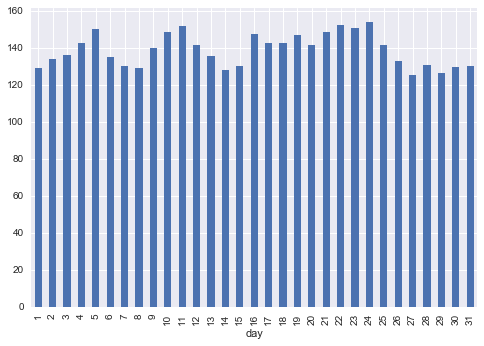

In [19]:
training.groupby('day') ['Count'].mean().plot.bar()

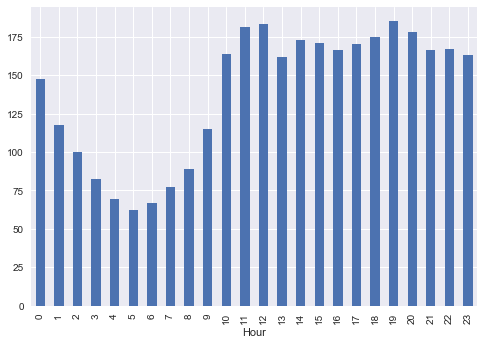

In [20]:
training.groupby('Hour')['Count'].mean().plot.bar()

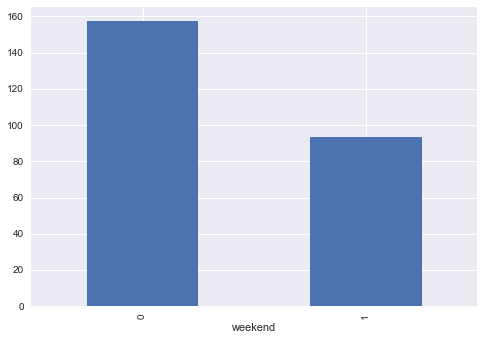

In [21]:
training.groupby('weekend') ['Count'].mean().plot.bar()

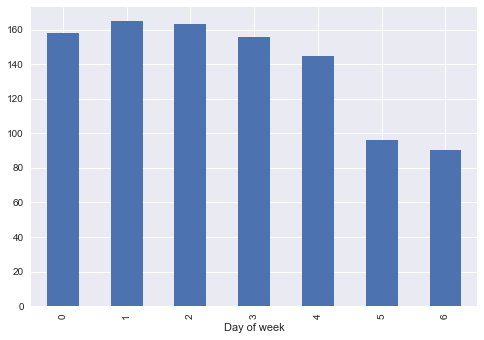

In [22]:
training.groupby('Day of week') ['Count'].mean().plot.bar()

In [23]:
training.Timestamp = pd.to_datetime(training.Datetime, format = '%d-%m-%y %H:%M')
training.index = training.Timestamp

#Hourly_sampling
hourly = training.resample('H').mean()

#Daily_sampling
daily = training.resample('D').mean()

#Weekly_sampling
weekly = training.resample('W').mean()

#Monthly_sampling
monthly = training.resample('M').mean()

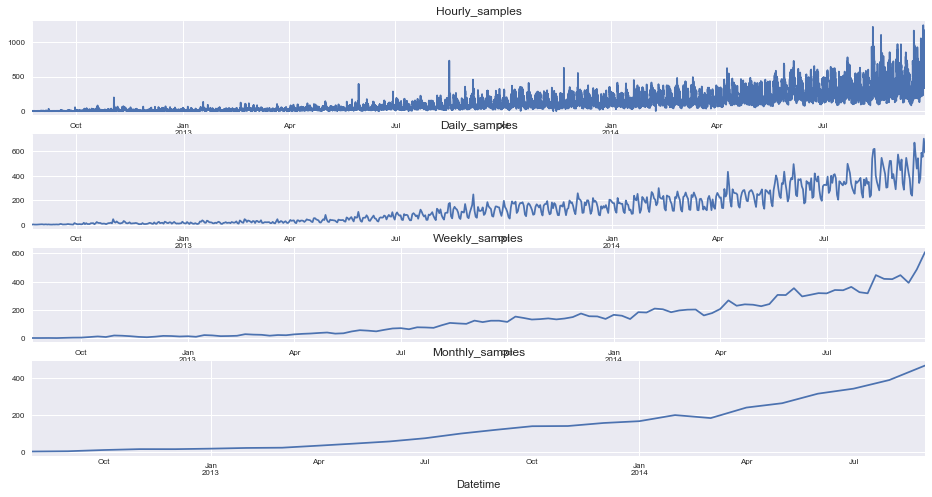

In [24]:
fig,axs = plt.subplots(4,1)

hourly.Count.plot(figsize = (16,8), title = "Hourly_samples", fontsize = 8, ax = axs[0])
daily.Count.plot(figsize = (16,8), title = "Daily_samples", fontsize = 8, ax = axs[1])
weekly.Count.plot(figsize = (16,8), title = "Weekly_samples", fontsize = 8, ax = axs[2])
monthly.Count.plot(figsize = (16,8), title = "Monthly_samples", fontsize = 8, ax = axs[3])

In [25]:
testing.Timestamp = pd.to_datetime(testing.Datetime, format='%d-%m-%Y %H:%M')
testing.index = testing.Timestamp

#Converting to Daily mean 
testing = testing.resample('D').mean()

training.Timestamp = pd.to_datetime(training.Datetime, format='%d-%m-%Y %H:%M')
training.index = training.Timestamp

#Converting to Daily mean
training = training.resample('D').mean()

**Splitting data into Training set and Validation set**

In [26]:
Training_Data = training.ix['2012-08-25':'2014-06-25']
Validation_Data = training.ix['2014-06-25':'2014-09-25']

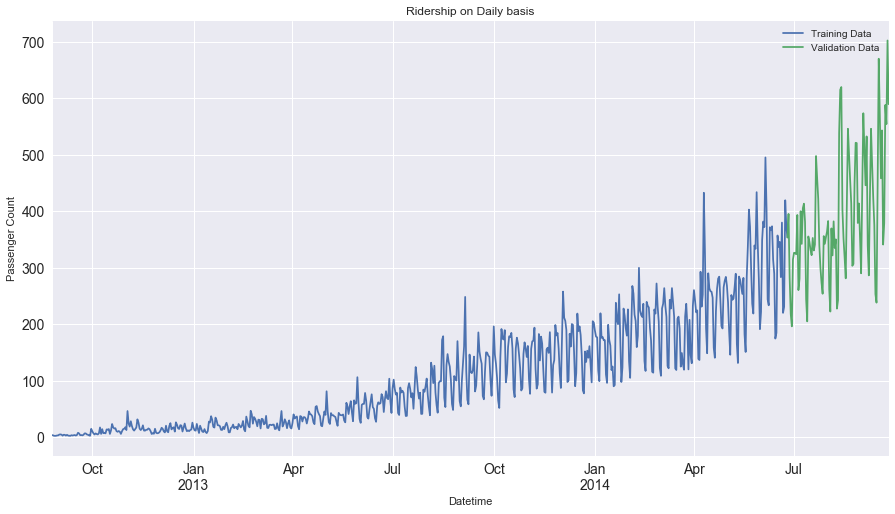

In [27]:
Training_Data.Count.plot(figsize = (15,8), title = 'Daily Ridership', fontsize = 14, label = 'Training Data')
Validation_Data.Count.plot(figsize = (15,8), title = 'Ridership on Daily basis', fontsize =14, label = 'Validation Data')
plt.xlabel('Datetime')
plt.ylabel('Passenger Count')
plt.legend(loc = 'best')

**Naive Approach**

Text(0.5, 1.0, 'Naive Bayes Forecast')

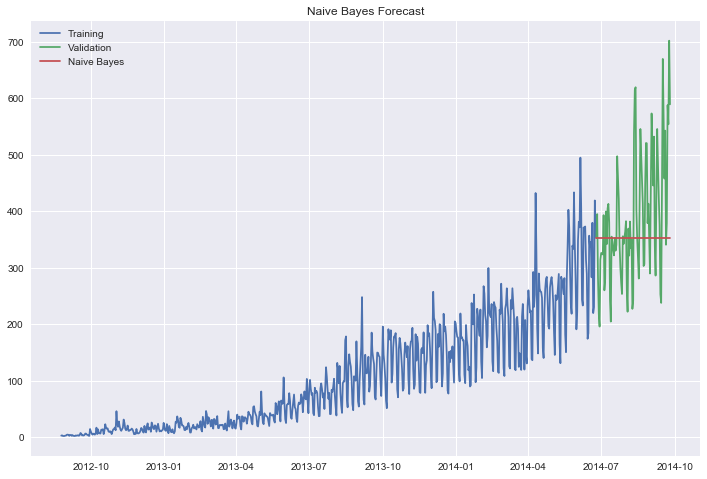

In [28]:
#NAIVE BAYES APPROACH
dd = np.asarray(Training_Data.Count)
y_hat =Validation_Data.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Training_Data.index, Training_Data['Count'],label = 'Training')
plt.plot(Validation_Data.index, Validation_Data['Count'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive Bayes')
plt.legend(loc = 'best')
plt.title('Naive Bayes Forecast')

*** Calculating RMSE for Naive Approach***

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Validation_Data.Count, y_hat.naive))
rmse

116.07386066221912

**Moving Average Method**

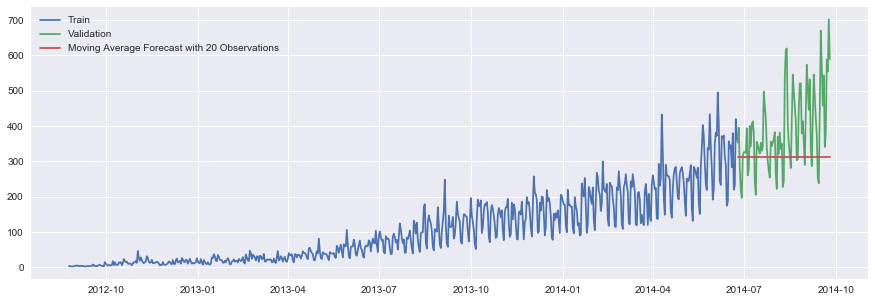

In [30]:
y_hat_avg = Validation_Data.copy()
y_hat_avg['moving_average_forecast'] = Training_Data['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Training_Data['Count'], label = 'Train')
plt.plot(Validation_Data['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = 'Moving Average Forecast with 20 Observations')
plt.legend(loc = 'best')
plt.show()

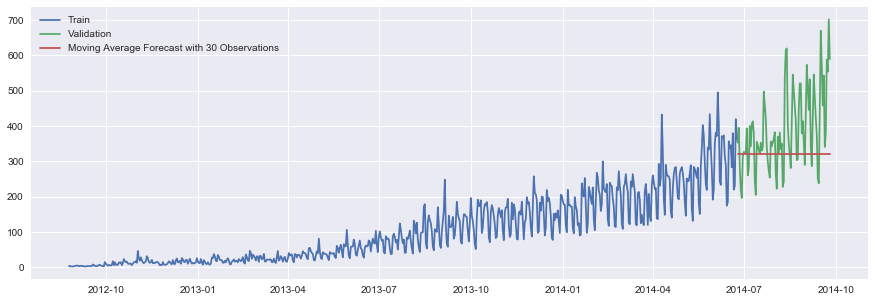

In [31]:
y_hat_avg = Validation_Data.copy()
y_hat_avg['moving_average_forecast'] = Training_Data['Count'].rolling(30).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Training_Data['Count'], label = 'Train')
plt.plot(Validation_Data['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'],label = 'Moving Average Forecast with 30 Observations')
plt.legend(loc = 'best')
plt.show()

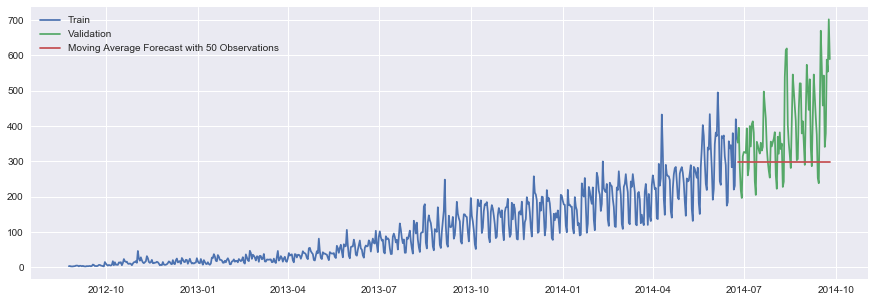

In [32]:
y_hat_avg = Validation_Data.copy()
y_hat_avg['moving_average_forecast']= Training_Data['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize = (15,5))
plt.plot(Training_Data['Count'], label = 'Train')
plt.plot(Validation_Data['Count'], label = 'Validation')
plt.plot(y_hat_avg['moving_average_forecast'], label = "Moving Average Forecast with 50 Observations")
plt.legend(loc = 'best')
plt.show()

*** RMSE for MOVING AVERAGE ***

In [33]:
rmse = sqrt(mean_squared_error(Validation_Data['Count'], y_hat_avg['moving_average_forecast']))
rmse

142.78253128214578

*** SIMPLE EXPONENTIAL SMOOTHING ***

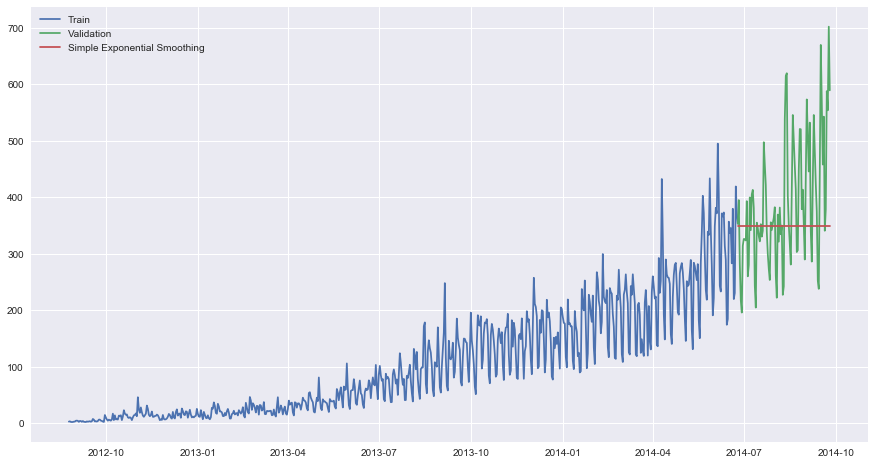

In [34]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = Validation_Data.copy()
fit2 = SimpleExpSmoothing(np.asarray(Training_Data['Count'])).fit(smoothing_level = 0.4,optimized = True)
y_hat['SES'] = fit2.forecast(len(Validation_Data))
plt.figure(figsize =(15,8))
plt.plot(Training_Data['Count'], label = 'Train')
plt.plot(Validation_Data['Count'], label = 'Validation')
plt.plot(y_hat['SES'], label = 'Simple Exponential Smoothing')
plt.legend(loc = 'best')


*** SIMPLE EXPONENTIAL SMOOTHING RMSE SCORE ***

In [35]:
rmse = sqrt(mean_squared_error(Validation_Data.Count, y_hat['SES']))
rmse

117.72373962206149

*** HOLTS TREND LINEAR MODEL ***

<Figure size 1280x640 with 0 Axes>

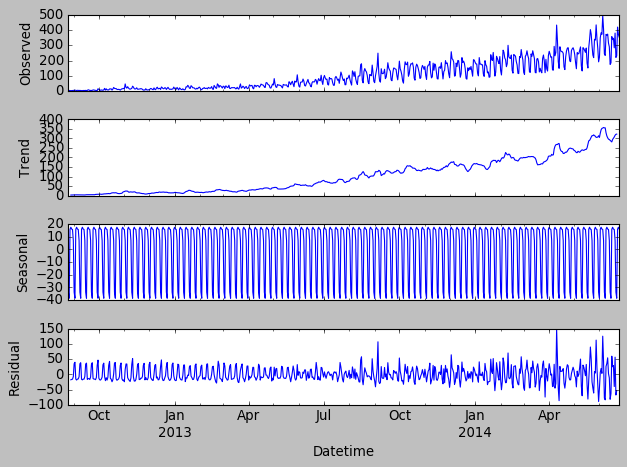

In [36]:
plt.style.use('classic')
plt.figure(figsize = (16,8))
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Training_Data.Count).plot()
result = sm.tsa.stattools.adfuller(training.Count)
plt.show()

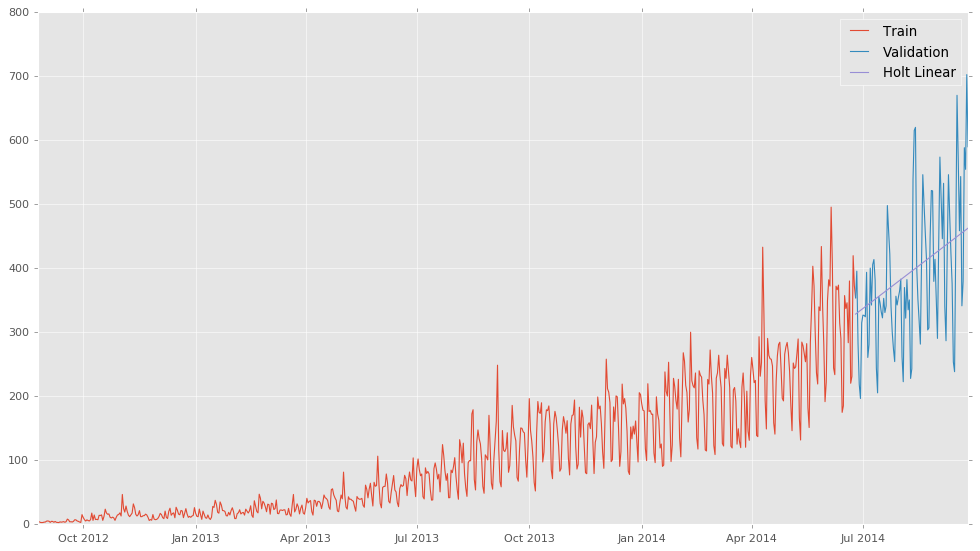

In [37]:
y_hat_holts = Validation_Data.copy()
fit1 = Holt(np.asarray(Training_Data['Count'])).fit(smoothing_level = 0.2, smoothing_slope = 0.1)
y_hat_holts['Holt_linear'] = fit1.forecast(len(Validation_Data))
plt.style.use('ggplot')
plt.figure(figsize = (15,8))
plt.plot(Training_Data.Count, label = 'Train')
plt.plot(Validation_Data.Count, label = 'Validation')
plt.plot(y_hat_holts['Holt_linear'], label = 'Holt Linear')
plt.legend(loc = 'best')

In [38]:
rmse = sqrt(mean_squared_error(Validation_Data.Count, y_hat_holts.Holt_linear))
rmse

96.49533955246773

In [39]:
#Making the prediction on the test set
predicts = fit1.forecast(len(testing))
testing['prediction'] = predicts

In [40]:
#Calculating hourly ration of count
training_org['ratio'] = training_org['Count']/training_org['Count'].sum()

#Grouping hourly ratio
temporary = training_org.groupby(['Hour']) ['ratio'].sum()

#Group by to csv format
pd.DataFrame(temporary, columns= ['Hour', 'ratio']).to_csv('Group_by.csv')
temporary2 = pd.read_csv("Group_by.csv")
temporary2 =temporary2.drop('Hour.1',1)
#Merge test and test_original on day, month and year
merge = pd.merge(testing, testing_org, on = ('day', 'month','year'), how = 'left')
merge['Hour'] = merge['Hour_y']
merge = merge.drop(['year','month','day','Hour_x','Datetime','Hour_y'], axis =1)

#Predicting by merging temp2 and merge
prediction = pd.merge(merge, temporary2, on = 'Hour',how = 'left')

#Converting the ration to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction['ID'] = prediction['ID_y']
prediction.head()

,ID_x,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,328.12898,18288,0,0.044287,348.761110,18288
1,18299.5,328.12898,18289,1,0.035343,278.329612,18289
2,18299.5,328.12898,18290,2,0.029911,235.552579,18290
3,18299.5,328.12898,18291,3,0.024714,194.628681,18291
4,18299.5,328.12898,18292,4,0.020802,163.819549,18292


In [41]:
submissions = prediction.drop(['ID_x','ID_y','prediction','Hour','ratio'], axis =1)
pd.DataFrame(submissions, columns = ['ID','Count']).to_csv('Holt_Linear_Output.csv')

In [42]:
linearoutput =  pd.read_csv('Holt_Linear_Output.csv')
linearoutput.head(20)

,Unnamed: 0,ID,Count
0,0,18288,348.761110
1,1,18289,278.329612
2,2,18290,235.552579
3,3,18291,194.628681
4,4,18292,163.819549
5,5,18293,146.645518
6,6,18294,157.683753
7,7,18295,182.871504
8,8,18296,210.587947
9,9,18297,272.125640


*** HOLT WINTER MODEL ***

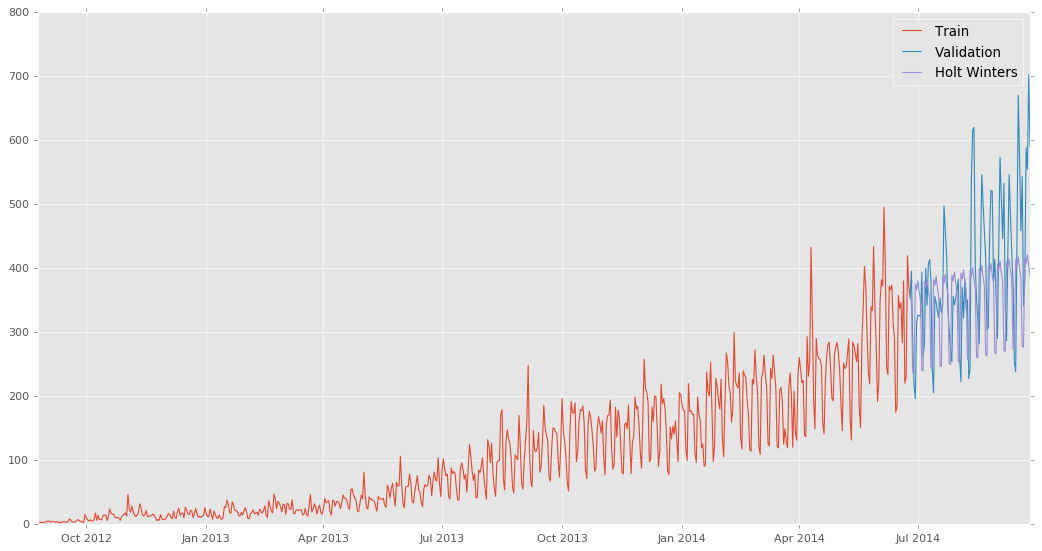

In [43]:
y_hat_avg = Validation_Data.copy()
fit1 = ExponentialSmoothing(np.asarray(Training_Data['Count']), seasonal_periods= 7, trend = 'add', seasonal= 'add').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(Validation_Data))
plt.figure(figsize = (16,8))
plt.plot(Training_Data['Count'], label = 'Train')
plt.plot(Validation_Data['Count'], label = 'Validation')
plt.plot(y_hat_avg.Holt_Winter, label = 'Holt Winters')
plt.legend(loc = 'best')



In [44]:
#RMSE of HOLTS WINTER MODEL
rmse = sqrt(mean_squared_error(Validation_Data['Count'], y_hat_avg['Holt_Winter']))
rmse

111.40796139330763

***Apply on Test Data ***

In [45]:
predicts = fit1.forecast(len(testing))
testing['prediction'] = predicts

In [46]:
#Merge test and test_original on day,month and year
merge = pd.merge(testing, testing_org, on = ('day', 'month', 'year'), how = 'left')
merge['Hour']= merge['Hour_y']
merge.head()
merge = merge.drop(['year', 'month', 'Datetime','Hour_x', 'Hour_y'], axis =1)

#Predicting by merge and temp2
prediction = pd.merge(merge, temporary2 , on = 'Hour', how = 'left')

#Converting the ration to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] *24
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio,Count
0,18299.5,26.0,358.931169,18288,0,0.044287,381.500082
1,18299.5,26.0,358.931169,18289,1,0.035343,304.457025
2,18299.5,26.0,358.931169,18290,2,0.029911,257.664418
3,18299.5,26.0,358.931169,18291,3,0.024714,212.898903
4,18299.5,26.0,358.931169,18292,4,0.020802,179.197650


In [47]:
prediction['ID']= prediction['ID_y']
submission = prediction.drop(['ID_x','ID_y','day','Hour','prediction','ratio'], axis =1)

pd.DataFrame(submission, columns = ['ID','Count']).to_csv('Holt winters_modelOutput.csv')

*** ARIMA MODEL***

In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    #Determine rolling statistics
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    
    #Plot rolling Statistics
    orig = plt.plot(timeseries, color = "blue", label = "Original")
    mean = plt.plot(rolmean, color = "red", label = "Rolling Mean")
    std = plt.plot(rolstd, color = "black", label = "Rolling Std")
    plt.legend(loc = "best")
    plt.title("Rolling Mean and Standard Deviation")
    plt.show(block = False)
    plt.style.use('seaborn-paper')
    
    #Perform Dickey Fuller test
    print("Results of Dickey Fuller test: ")
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistics', 'p-value', '# Lag Used', 'Number of Observations Used'])
    
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

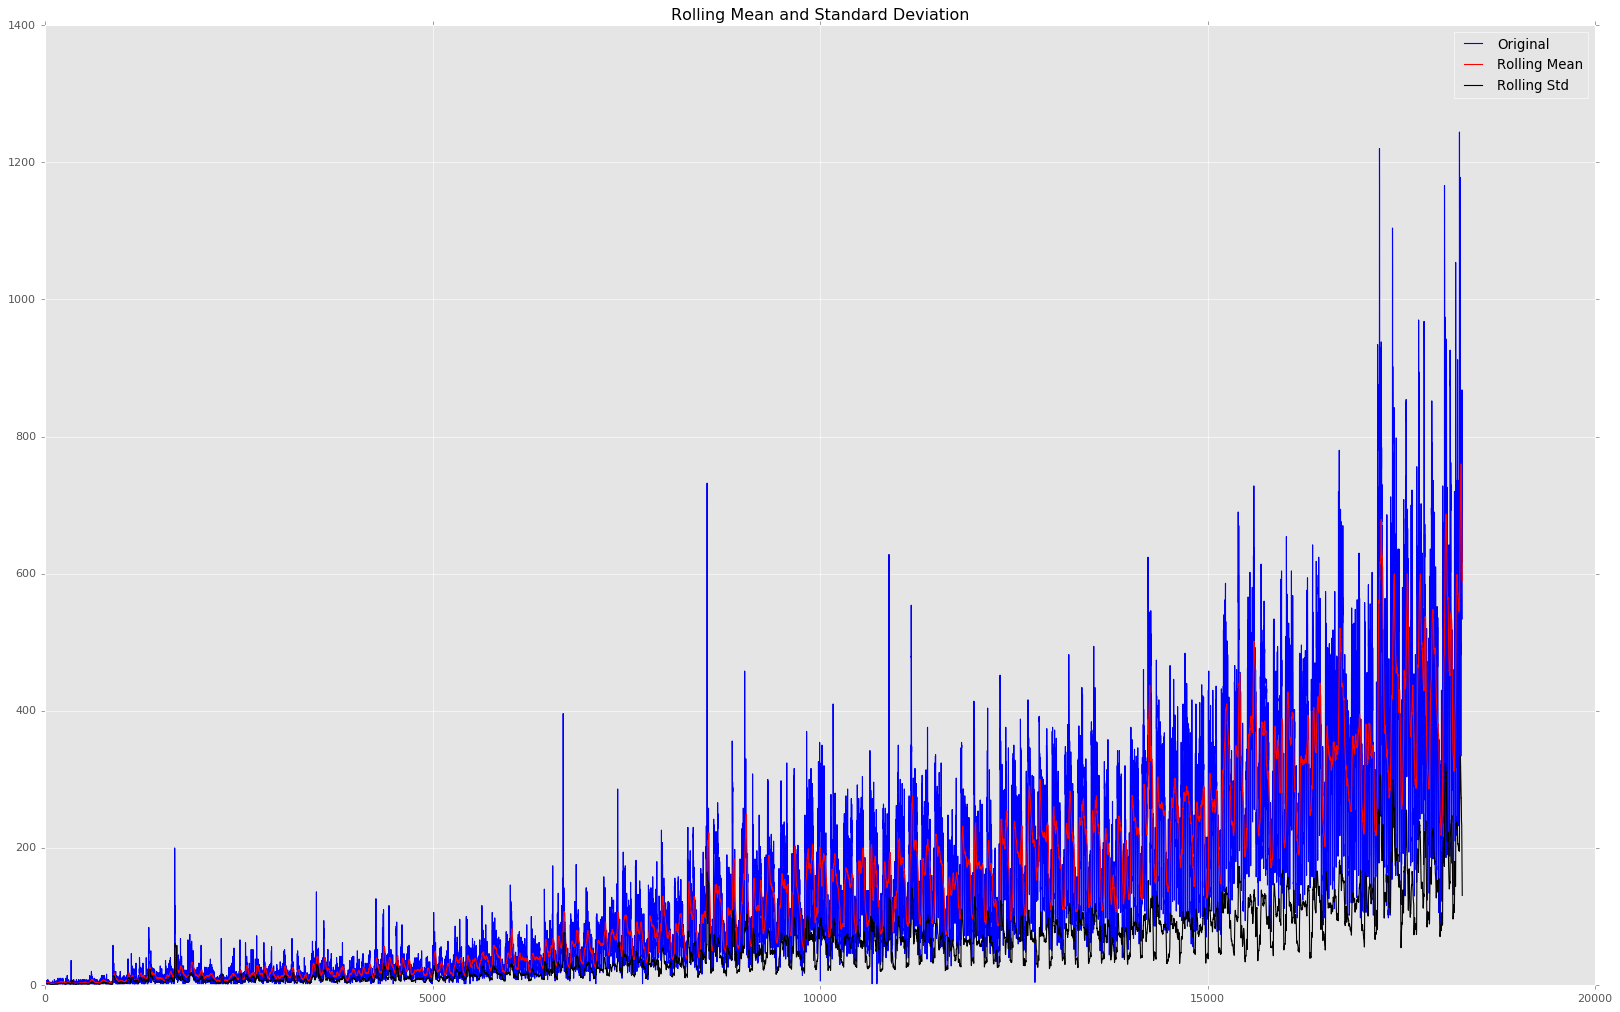

Results of Dickey Fuller test: 
Test Statistics                   -4.456561
p-value                            0.000235
# Lag Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [49]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=(25,15)
test_stationary(training_org['Count'])

In [50]:
#REMOVING TREND VALUES
Training_log = np.log(Training_Data['Count'])
validation_log = np.log(Validation_Data['Count'])

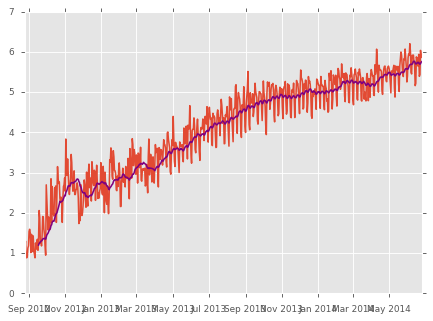

In [51]:
moving_average = Training_log.rolling(24).mean()
plt.plot(Training_log)
plt.plot(moving_average, color = 'purple')

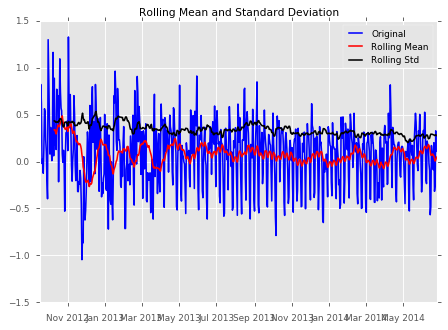

Results of Dickey Fuller test: 
Test Statistics               -5.867311e+00
p-value                        3.302272e-07
# Lag Used                     2.000000e+01
Number of Observations Used    6.260000e+02
Critical Value (1%)           -3.440839e+00
Critical Value (5%)           -2.866168e+00
Critical Value (10%)          -2.569235e+00
dtype: float64


In [52]:
training_log_moving_diff = Training_log - moving_average
training_log_moving_diff.dropna(inplace = True)
test_stationary(training_log_moving_diff)

*** ELIMINATING THE TREND WITH DIFFERENCING TO MAKE THE SERIES STABLE***

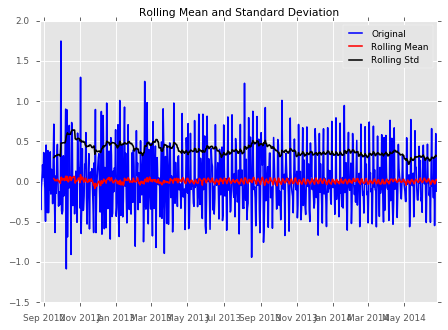

Results of Dickey Fuller test: 
Test Statistics               -8.253359e+00
p-value                        5.317209e-13
# Lag Used                     1.900000e+01
Number of Observations Used    6.490000e+02
Critical Value (1%)           -3.440466e+00
Critical Value (5%)           -2.866004e+00
Critical Value (10%)          -2.569147e+00
dtype: float64


In [53]:
training_log_diff = Training_log - Training_log.shift(1)
test_stationary(training_log_diff.dropna())

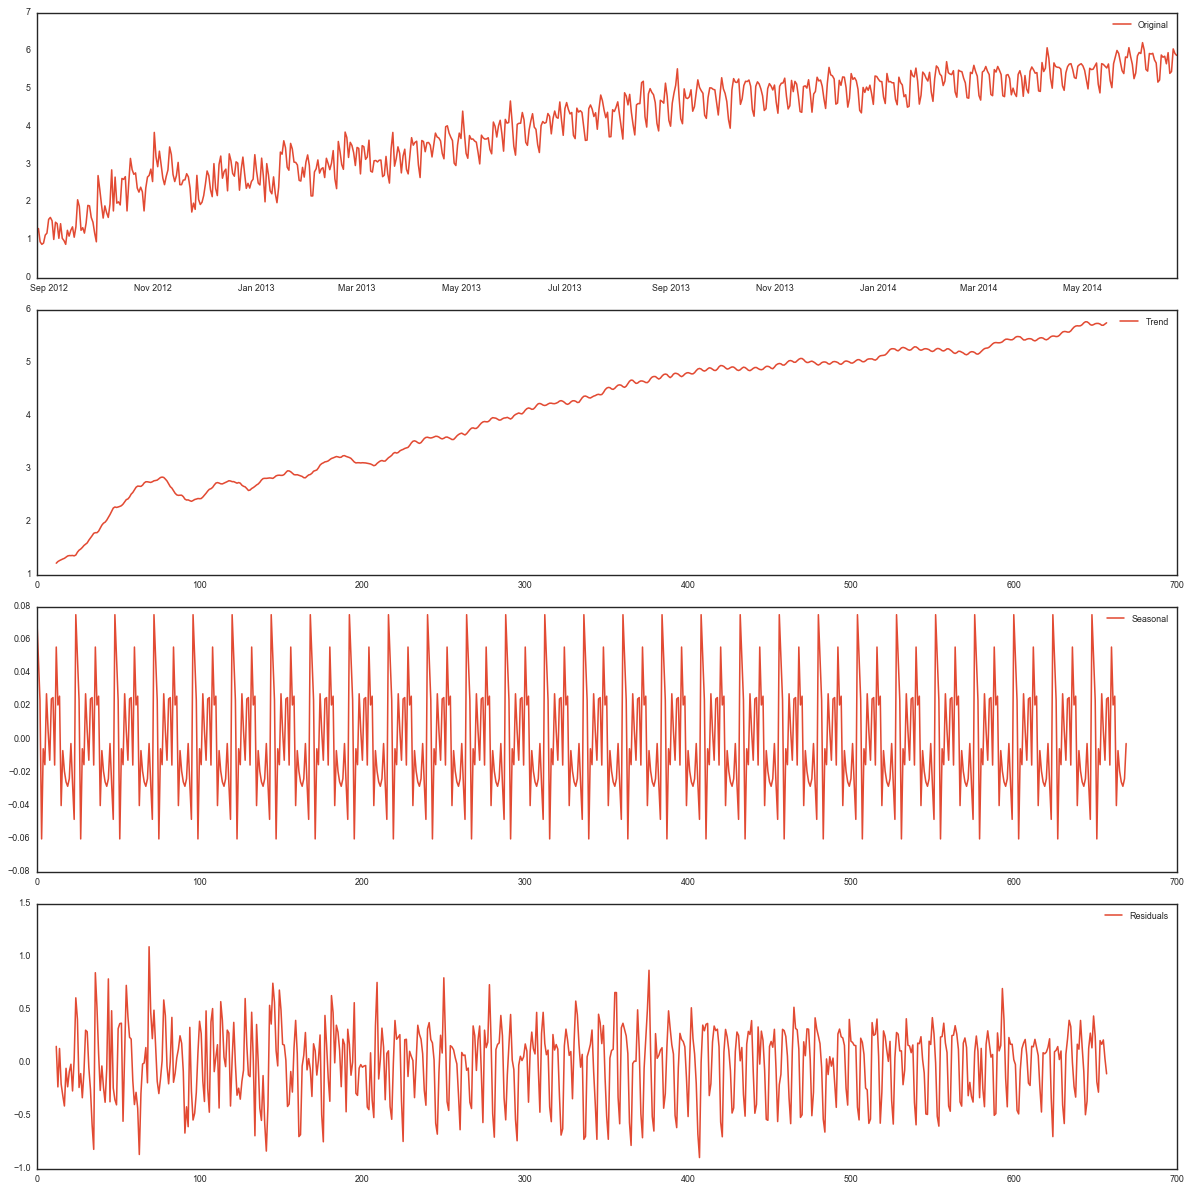

In [54]:
#REMOVING THE SEASONAL DATA
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (15,15))
decomposition = seasonal_decompose(pd.DataFrame(Training_log).Count.values, freq = 24)
plt.style.use('seaborn-white')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Training_log, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()


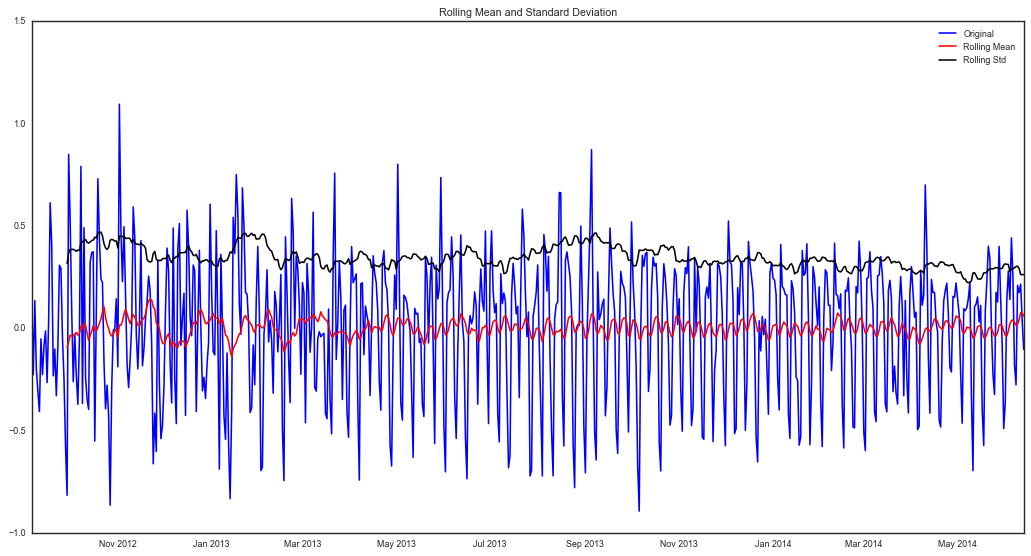

Results of Dickey Fuller test: 
Test Statistics               -7.830840e+00
p-value                        6.299419e-12
# Lag Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


In [55]:
#Checking stationarity of Residuals
plt.figure(figsize = (16,8))
training_log_decompose = pd.DataFrame(residual)
training_log_decompose['date'] = Training_log.index
training_log_decompose.set_index('date', inplace = True)
training_log_decompose.dropna(inplace = True)
test_stationary(training_log_decompose[0])

In [56]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(training_log_diff.dropna(), nlags = 25)
lag_pacf = pacf(training_log_diff.dropna(), nlags = 25, method= "ols")

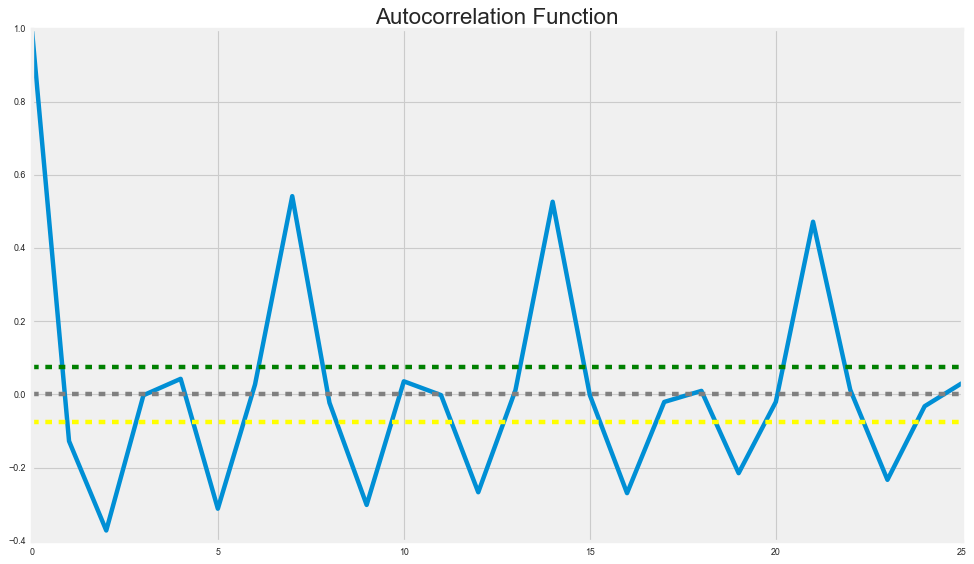

In [57]:
plt.figure(figsize = (15,8))
plt.style.use("fivethirtyeight")
plt.plot(lag_acf)
plt.axhline( y = 0, linestyle = "--", color = "gray")
plt.axhline( y= -1.97/np.sqrt(len(training_log_diff.dropna())), linestyle = "--", color = "yellow")
plt.axhline(y = 1.97 /np.sqrt(len(training_log_diff.dropna())), linestyle = "--", color = "green")
plt.title("Autocorrelation Function")
plt.show()

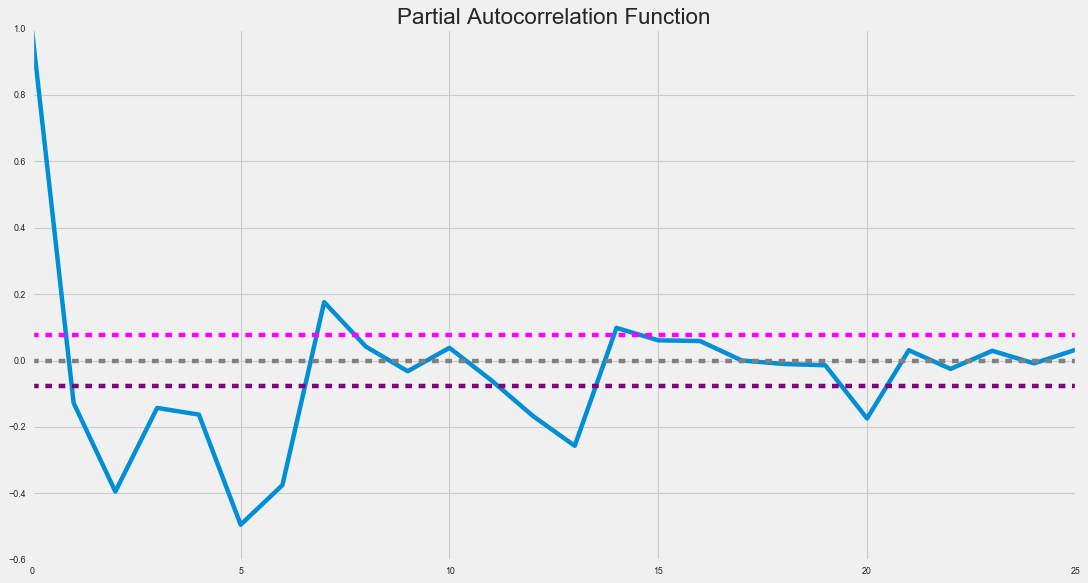

In [58]:
#Partial Auto Correlation Function
plt.figure(figsize = (15,8))
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = "--", color = "gray")
plt.axhline(y = -1.97/np.sqrt(len(training_log_diff.dropna())), linestyle = "--", color = "purple")
plt.axhline( y = 1.97/np.sqrt(len(training_log_diff.dropna())), linestyle = "--", color = "Magenta")
plt.title("Partial Autocorrelation Function")
plt.show()

**AR MODEL**


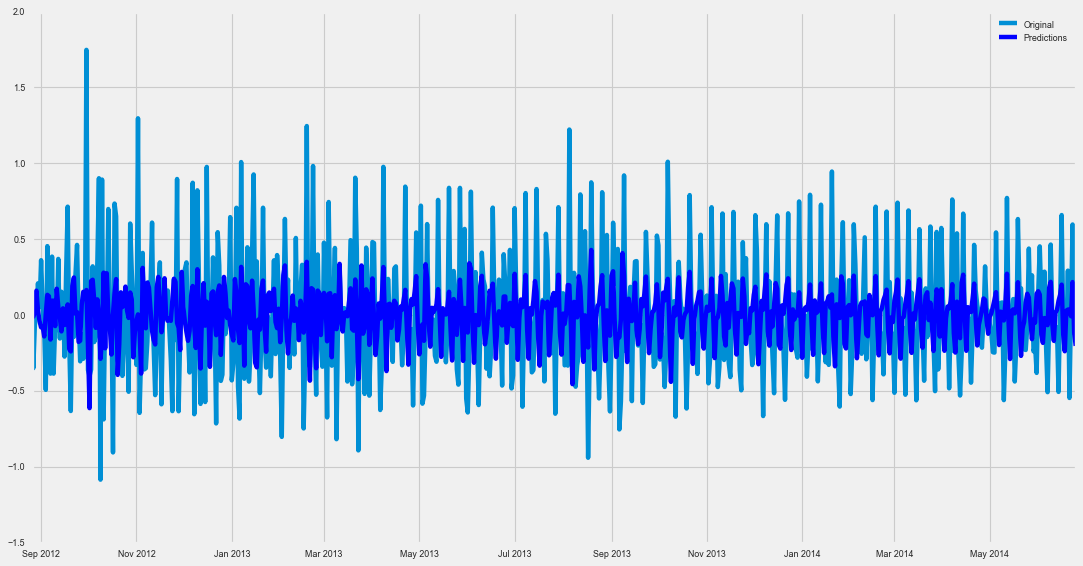

In [59]:
#ARMODEL
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Training_log, order = (2,1,0))  #here q value is zero since it is just AR Model
results_ARmodel = model.fit(disp=-1)
plt.plot(training_log_diff.dropna(), label = "Original")
plt.plot(results_ARmodel.fittedvalues, color = 'blue', label = 'Predictions')
plt.legend(loc = 'best')


In [60]:
AR_predicts = results_ARmodel.predict(start="2014-06-25", end="2014-09-25")
AR_predicts = AR_predicts.cumsum().shift().fillna(0)
AR_predicts1 = pd.Series(np.ones(Validation_Data.shape[0])* np.log(Validation_Data['Count'])[0], index = Validation_Data.index)
AR_predicts1=AR_predicts1.add(AR_predicts,fill_value=0)
AR_predicts = np.exp(AR_predicts1)

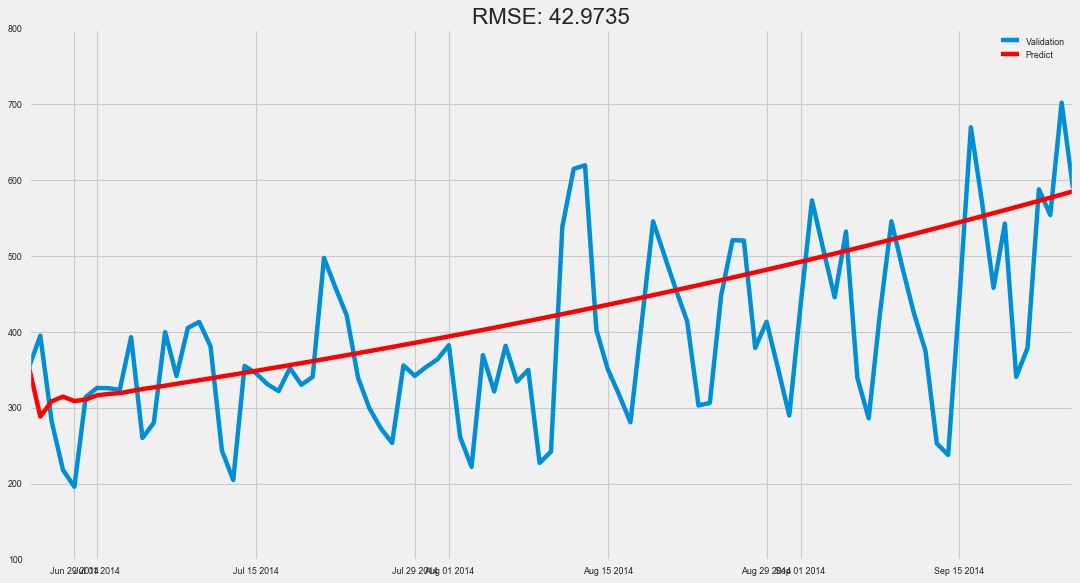

In [61]:
plt.figure(figsize = (15,8))
plt.plot(Validation_Data['Count'], label = "Validation")
plt.plot(AR_predicts, color = "red", label = "Predict")
plt.legend(loc = "best")
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predicts, Validation_Data['Count']))/Validation_Data.shape[0]))
plt.show()

**MA MODEL**

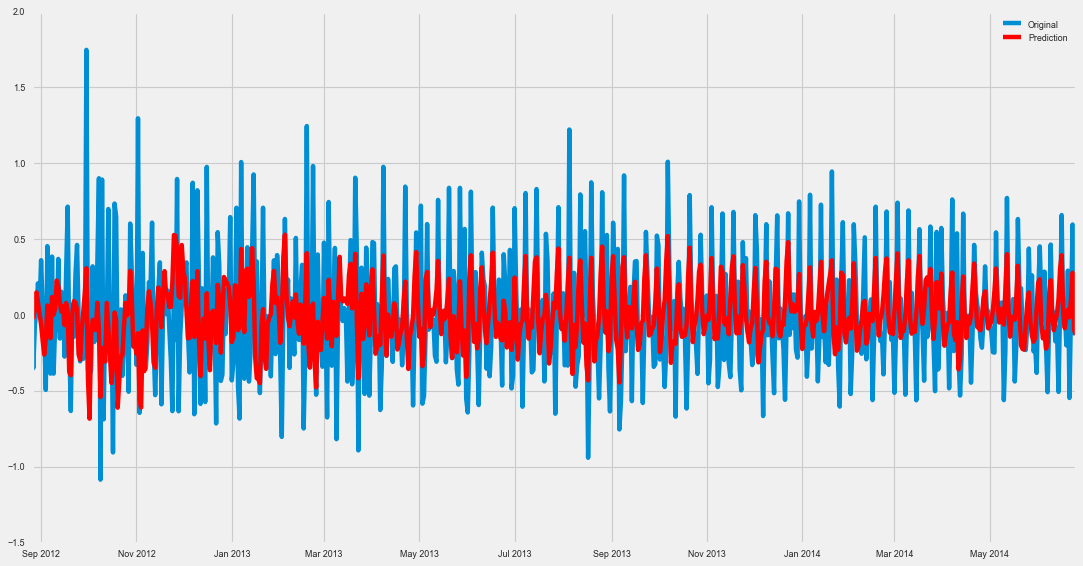

In [62]:
plt.figure(figsize = (15,8))
model = ARIMA(Training_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(training_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")

**MA MODEL**

In [63]:
MA_predict = results_MA.predict(start="2014-06-25", end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(Validation_Data.shape[0]) * np.log(Validation_Data['Count'])[0], index = Validation_Data.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict = np.exp(MA_predict1)

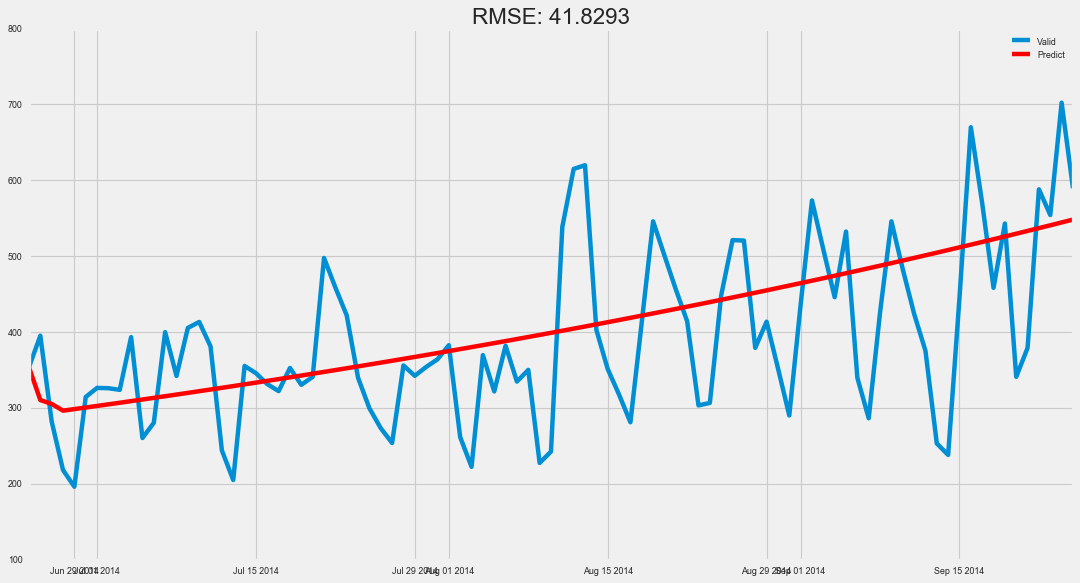

In [64]:
plt.figure(figsize = (15,8))
plt.plot(Validation_Data['Count'], label = "Valid")
plt.plot(MA_predict, color = 'red', label = "Predict")
plt.legend(loc= 'best')
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, Validation_Data['Count']))/Validation_Data.shape[0]))
plt.show()

**AR + INTERGRATE + MA MODEL**

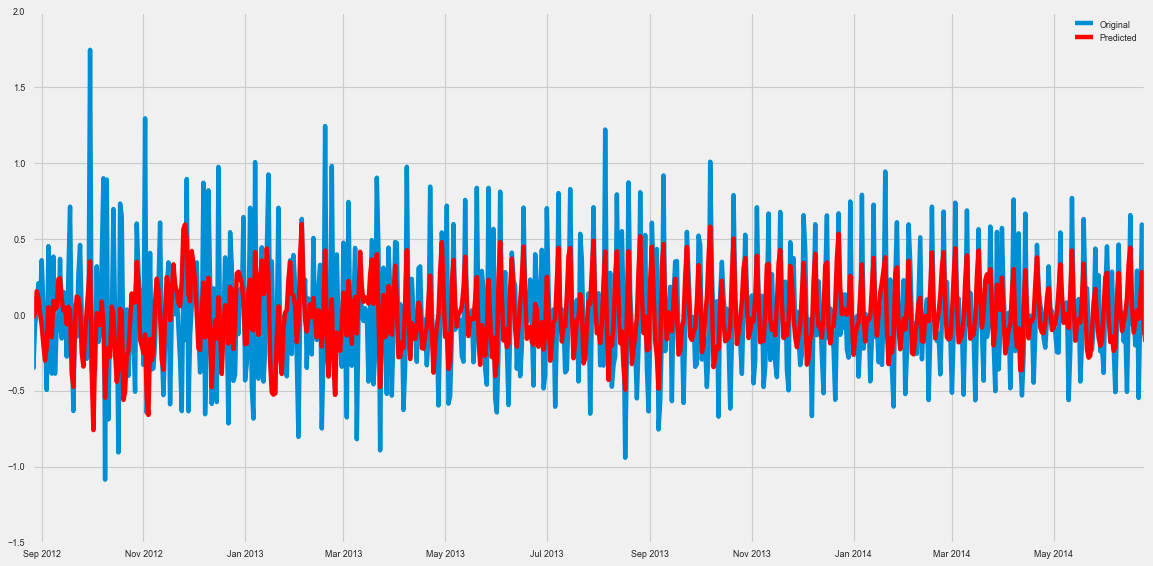

In [65]:
#Combined Model
plt.figure(figsize = (16,8))
model = ARIMA(Training_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(training_log_diff.dropna(),  label='Original')
plt.plot(results_ARIMA.fittedvalues, color='red', label='Predicted')
plt.legend(loc='best')
plt.show()

In [66]:
#Function to scale model to original scale

def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [67]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
    
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()

In [68]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

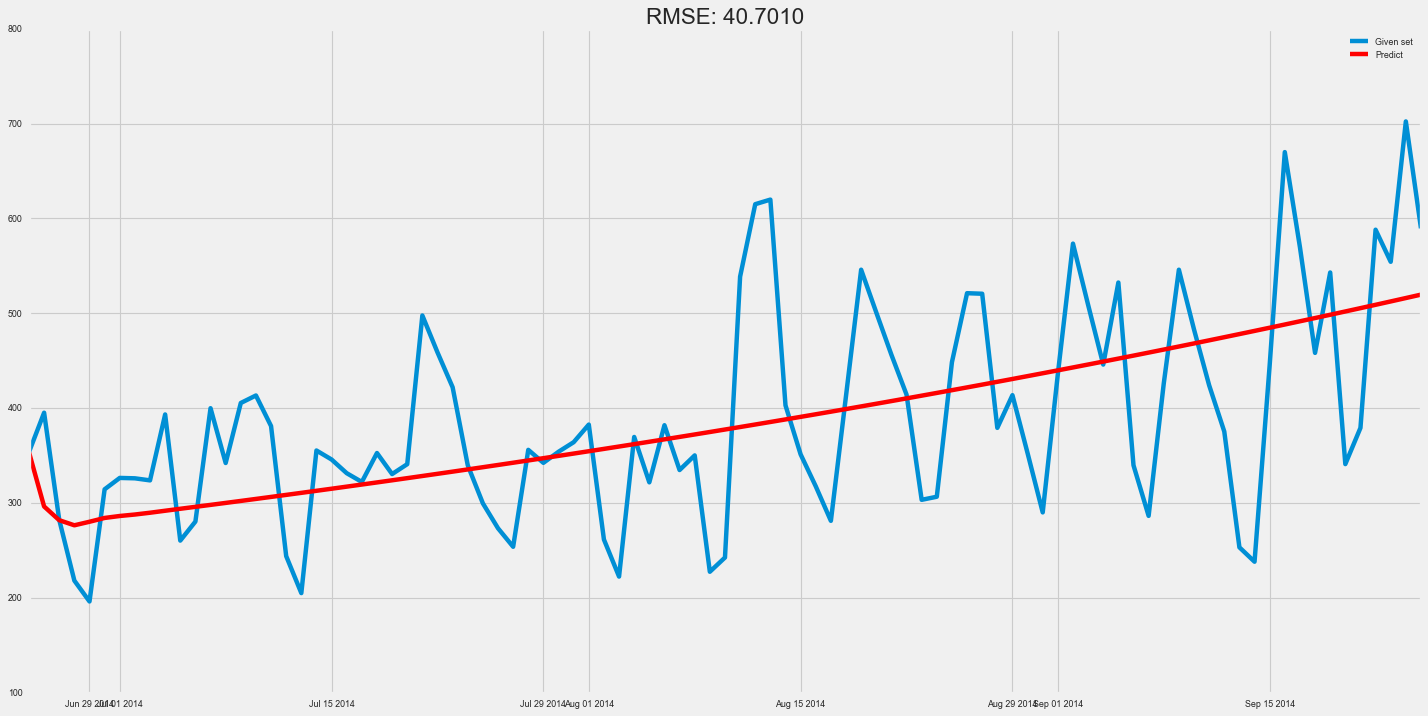

In [69]:
plt.figure(figsize = (20,10))
check_prediction_diff(ARIMA_predict_diff, Validation_Data)

In [70]:
#SARIMAX MODEL
import statsmodels.api as sm

C:\Users\suman\Miniconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0.5, 1.0, 'SARIMAX Model')

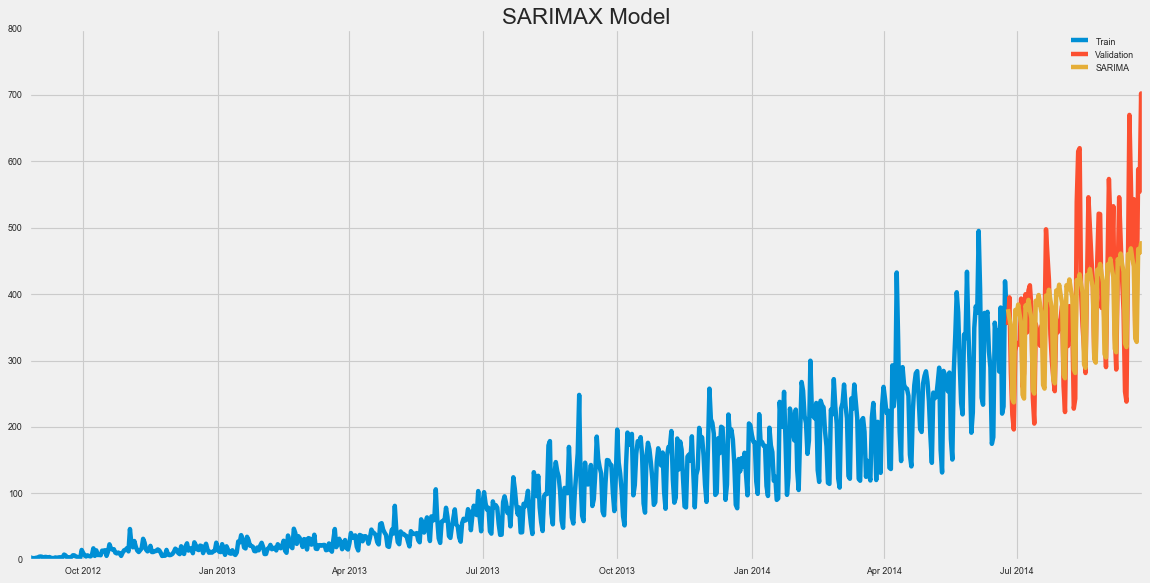

In [71]:
y_hat_avg = Validation_Data.copy()
fit1 = sm.tsa.statespace.SARIMAX(Training_Data.Count, order = (2,1,4), seasonal_order =(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Training_Data['Count'], label = "Train")
plt.plot(Validation_Data.Count, label = "Validation")
plt.plot(y_hat_avg['SARIMA'], label ="SARIMA")
plt.legend(loc = "best")
plt.title("SARIMAX Model")

In [72]:
rms = sqrt(mean_squared_error(Validation_Data.Count, y_hat_avg.SARIMA))
print(rms)

70.65414906306675


In [73]:
predict = fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=False)

In [74]:
testing['prediction']=predict

In [75]:
#Merge test and test_original on day,month and year
merge = pd.merge(testing,testing_org, on = ('day', 'month', 'year'), how = 'left')
merge['Hour'] = merge['Hour_y']

#Predicting by merging merge and temp2
prediction = pd.merge(merge, temporary2, on = 'Hour', how = 'left')

#Converting the ratio to original scale
prediction['Count'] = prediction['prediction'] * prediction['ratio'] * 24
prediction.head(20)

,ID_x,month,year,Hour_x,day,prediction,ID_y,Datetime,Hour_y,Hour,ratio,Count
0,18299.5,9.0,2014.0,11.5,26.0,444.577053,18288,2014-09-26 00:00:00,0,0,0.044287,472.531217
1,18299.5,9.0,2014.0,11.5,26.0,444.577053,18289,2014-09-26 01:00:00,1,1,0.035343,377.104633
2,18299.5,9.0,2014.0,11.5,26.0,444.577053,18290,2014-09-26 02:00:00,2,2,0.029911,319.146670
3,18299.5,9.0,2014.0,11.5,26.0,444.577053,18291,2014-09-26 03:00:00,3,3,0.024714,263.699492
4,18299.5,9.0,2014.0,11.5,26.0,444.577053,18292,2014-09-26 04:00:00,4,4,0.020802,221.956659
5,18299.5,9.0,2014.0,11.5,26.0,444.577053,18293,2014-09-26 05:00:00,5,5,0.018621,198.687822
6,18299.5,9.0,2014.0,11.5,26.0,444.577053,18294,2014-09-26 06:00:00,6,6,0.020023,213.643361
7,18299.5,9.0,2014.0,11.5,26.0,444.577053,18295,2014-09-26 07:00:00,7,7,0.023221,247.769869
8,18299.5,9.0,2014.0,11.5,26.0,444.577053,18296,2014-09-26 08:00:00,8,8,0.026741,285.322464
9,18299.5,9.0,2014.0,11.5,26.0,444.577053,18297,2014-09-26 09:00:00,9,9,0.034555,368.698965


In [76]:
prediction['ID']=prediction['ID_y']
submission1=prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

# Converting the final submission to csv format
pd.DataFrame(submission1, columns=['ID','Count','prediction']).to_csv('SARIMAX_Output.csv')
submission1.head()

,month,year,Hour_x,Datetime,Hour_y,Count,ID
0,9.0,2014.0,11.5,2014-09-26 00:00:00,0,472.531217,18288
1,9.0,2014.0,11.5,2014-09-26 01:00:00,1,377.104633,18289
2,9.0,2014.0,11.5,2014-09-26 02:00:00,2,319.146670,18290
3,9.0,2014.0,11.5,2014-09-26 03:00:00,3,263.699492,18291
4,9.0,2014.0,11.5,2014-09-26 04:00:00,4,221.956659,18292


In [77]:
submission1.tail()

,month,year,Hour_x,Datetime,Hour_y,Count,ID
5107,4.0,2015.0,11.5,2015-04-26 19:00:00,19,746.282776,23395
5108,4.0,2015.0,11.5,2015-04-26 20:00:00,20,717.151974,23396
5109,4.0,2015.0,11.5,2015-04-26 21:00:00,21,669.385484,23397
5110,4.0,2015.0,11.5,2015-04-26 22:00:00,22,671.813931,23398
5111,4.0,2015.0,11.5,2015-04-26 23:00:00,23,655.934002,23399


In [78]:
submission.head()

,Count,ID
0,381.500082,18288
1,304.457025,18289
2,257.664418,18290
3,212.898903,18291
4,179.197650,18292
